In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


Disease prediction using machine learning is used in healthcare to provide accurate and early diagnosis based on patient symptoms. We can build predictive models that identify diseases efficiently. In this article, we will explore the end-to-end implementation of such a system.

In [64]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
df= pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [68]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [69]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [70]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [72]:
df = df.loc[:,['Id', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
df

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.4             0.700         0.00             1.9   
1        1            7.8             0.880         0.00             2.6   
2        2            7.8             0.760         0.04             2.3   
3        3           11.2             0.280         0.56             1.9   
4        4            7.4             0.700         0.00             1.9   
...    ...            ...               ...          ...             ...   
1138  1592            6.3             0.510         0.13             2.3   
1139  1593            6.8             0.620         0.08             1.9   
1140  1594            6.2             0.600         0.08             2.0   
1141  1595            5.9             0.550         0.10             2.2   
1142  1597            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                 29.0                  40.0  0.99574  3.42   
1139      0.068                 28.0                  38.0  0.99651  3.42   
1140      0.090                 32.0                  44.0  0.99490  3.45   
1141      0.062                 39.0                  51.0  0.99512  3.52   
1142      0.075                 32.0                  44.0  0.99547  3.57   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
1138       0.75     11.0        6  
1139       0.82      9.5        6  
1140       0.58     10.5        5  
1141       0.76     11.2        6  
1142       0.71     10.2        5  

[1143 rows x 13 columns]

In [73]:
print(df.head())

   Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        

In [74]:
df.columns

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [75]:
print(df.shape)

(1143, 13)


In [76]:
df

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.4             0.700         0.00             1.9   
1        1            7.8             0.880         0.00             2.6   
2        2            7.8             0.760         0.04             2.3   
3        3           11.2             0.280         0.56             1.9   
4        4            7.4             0.700         0.00             1.9   
...    ...            ...               ...          ...             ...   
1138  1592            6.3             0.510         0.13             2.3   
1139  1593            6.8             0.620         0.08             1.9   
1140  1594            6.2             0.600         0.08             2.0   
1141  1595            5.9             0.550         0.10             2.2   
1142  1597            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                 29.0                  40.0  0.99574  3.42   
1139      0.068                 28.0                  38.0  0.99651  3.42   
1140      0.090                 32.0                  44.0  0.99490  3.45   
1141      0.062                 39.0                  51.0  0.99512  3.52   
1142      0.075                 32.0                  44.0  0.99547  3.57   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
1138       0.75     11.0        6  
1139       0.82      9.5        6  
1140       0.58     10.5        5  
1141       0.76     11.2        6  
1142       0.71     10.2        5  

[1143 rows x 13 columns]

In [77]:
df["Id"] = df['Id'].astype(float)
df["quality"] = df['quality'].astype(float)
df["free sulfur dioxide"] = df['free sulfur dioxide'].astype(int)
df["total sulfur dioxide"] = df['total sulfur dioxide'].astype(int)
df

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0.0            7.4             0.700         0.00             1.9   
1        1.0            7.8             0.880         0.00             2.6   
2        2.0            7.8             0.760         0.04             2.3   
3        3.0           11.2             0.280         0.56             1.9   
4        4.0            7.4             0.700         0.00             1.9   
...      ...            ...               ...          ...             ...   
1138  1592.0            6.3             0.510         0.13             2.3   
1139  1593.0            6.8             0.620         0.08             1.9   
1140  1594.0            6.2             0.600         0.08             2.0   
1141  1595.0            5.9             0.550         0.10             2.2   
1142  1597.0            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                   11                    34  0.99780  3.51   
1         0.098                   25                    67  0.99680  3.20   
2         0.092                   15                    54  0.99700  3.26   
3         0.075                   17                    60  0.99800  3.16   
4         0.076                   11                    34  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                   29                    40  0.99574  3.42   
1139      0.068                   28                    38  0.99651  3.42   
1140      0.090                   32                    44  0.99490  3.45   
1141      0.062                   39                    51  0.99512  3.52   
1142      0.075                   32                    44  0.99547  3.57   

      sulphates  alcohol  quality  
0          0.56      9.4      5.0  
1          0.68      9.8      5.0  
2          0.65      9.8      5.0  
3          0.58      9.8      6.0  
4          0.56      9.4      5.0  
...         ...      ...      ...  
1138       0.75     11.0      6.0  
1139       0.82      9.5      6.0  
1140       0.58     10.5      5.0  
1141       0.76     11.2      6.0  
1142       0.71     10.2      5.0  

[1143 rows x 13 columns]

In [78]:
df["quality"].value_counts()

quality
5.0    483
6.0    462
7.0    143
4.0     33
8.0     16
3.0      6
Name: count, dtype: int64

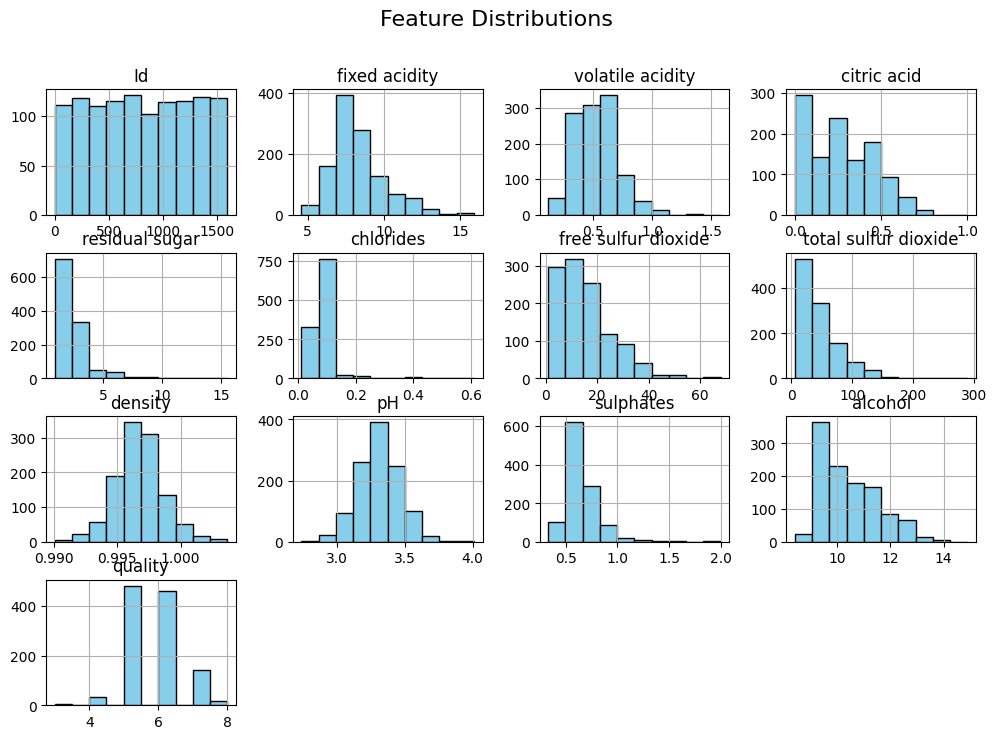

In [79]:
df.hist(figsize=(12, 8), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [81]:
max_value = df['free sulfur dioxide'].max()
min_value = df['free sulfur dioxide'].min()

print("Max:", max_value)
print("Min:", min_value)

Max: 68
Min: 1


In [83]:
def categorize_sulfur(value):
    if 1 <= value <= 10:
        return 1
    elif 11 <= value <= 20:
        return 2
    elif 21 <= value <= 30:
        return 3
    elif 31 <= value <= 40:
        return 4
    elif 41 <= value <= 50:
        return 5
    elif 51 <= value <= 60:
        return 6
    elif 61 <= value <= 69:
        return 7


df['sulfur_category'] = df['free sulfur dioxide'].apply(categorize_sulfur)


print(df[['free sulfur dioxide', 'sulfur_category']])

      free sulfur dioxide  sulfur_category
0                      11                2
1                      25                3
2                      15                2
3                      17                2
4                      11                2
...                   ...              ...
1138                   29                3
1139                   28                3
1140                   32                4
1141                   39                4
1142                   32                4

[1143 rows x 2 columns]


In [84]:
df

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0.0            7.4             0.700         0.00             1.9   
1        1.0            7.8             0.880         0.00             2.6   
2        2.0            7.8             0.760         0.04             2.3   
3        3.0           11.2             0.280         0.56             1.9   
4        4.0            7.4             0.700         0.00             1.9   
...      ...            ...               ...          ...             ...   
1138  1592.0            6.3             0.510         0.13             2.3   
1139  1593.0            6.8             0.620         0.08             1.9   
1140  1594.0            6.2             0.600         0.08             2.0   
1141  1595.0            5.9             0.550         0.10             2.2   
1142  1597.0            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                   11                    34  0.99780  3.51   
1         0.098                   25                    67  0.99680  3.20   
2         0.092                   15                    54  0.99700  3.26   
3         0.075                   17                    60  0.99800  3.16   
4         0.076                   11                    34  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                   29                    40  0.99574  3.42   
1139      0.068                   28                    38  0.99651  3.42   
1140      0.090                   32                    44  0.99490  3.45   
1141      0.062                   39                    51  0.99512  3.52   
1142      0.075                   32                    44  0.99547  3.57   

      sulphates  alcohol  quality  sulfur_category  
0          0.56      9.4      5.0                2  
1          0.68      9.8      5.0                3  
2          0.65      9.8      5.0                2  
3          0.58      9.8      6.0                2  
4          0.56      9.4      5.0                2  
...         ...      ...      ...              ...  
1138       0.75     11.0      6.0                3  
1139       0.82      9.5      6.0                3  
1140       0.58     10.5      5.0                4  
1141       0.76     11.2      6.0                4  
1142       0.71     10.2      5.0                4  

[1143 rows x 14 columns]

In [85]:
max_value = df['total sulfur dioxide'].max()
min_value = df['total sulfur dioxide'].min()

print("Max:", max_value)
print("Min:", min_value)

Max: 289
Min: 6


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   float64
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   int64  
 7   total sulfur dioxide  1143 non-null   int64  
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   float64
 13  sulfur_category       1143 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 125.1 KB


In [88]:
df.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
sulfur_category         0
dtype: int64

In [89]:
df.describe(include = "all").T

count        mean         std      min        25%  \
Id                    1143.0  804.969379  463.997116  0.00000  411.00000   
fixed acidity         1143.0    8.311111    1.747595  4.60000    7.10000   
volatile acidity      1143.0    0.531339    0.179633  0.12000    0.39250   
citric acid           1143.0    0.268364    0.196686  0.00000    0.09000   
residual sugar        1143.0    2.532152    1.355917  0.90000    1.90000   
chlorides             1143.0    0.086933    0.047267  0.01200    0.07000   
free sulfur dioxide   1143.0   15.614173   10.247585  1.00000    7.00000   
total sulfur dioxide  1143.0   45.914261   32.781712  6.00000   21.00000   
density               1143.0    0.996730    0.001925  0.99007    0.99557   
pH                    1143.0    3.311015    0.156664  2.74000    3.20500   
sulphates             1143.0    0.657708    0.170399  0.33000    0.55000   
alcohol               1143.0   10.442111    1.082196  8.40000    9.50000   
quality               1143.0    5.657043    0.805824  3.00000    5.00000   
sulfur_category       1143.0    2.011374    1.070563  1.00000    1.00000   

                            50%          75%         max  
Id                    794.00000  1209.500000  1597.00000  
fixed acidity           7.90000     9.100000    15.90000  
volatile acidity        0.52000     0.640000     1.58000  
citric acid             0.25000     0.420000     1.00000  
residual sugar          2.20000     2.600000    15.50000  
chlorides               0.07900     0.090000     0.61100  
free sulfur dioxide    13.00000    21.000000    68.00000  
total sulfur dioxide   37.00000    61.000000   289.00000  
density                 0.99668     0.997845     1.00369  
pH                      3.31000     3.400000     4.01000  
sulphates               0.62000     0.730000     2.00000  
alcohol                10.20000    11.100000    14.90000  
quality                 6.00000     6.000000     8.00000  
sulfur_category         2.00000     3.000000     7.00000

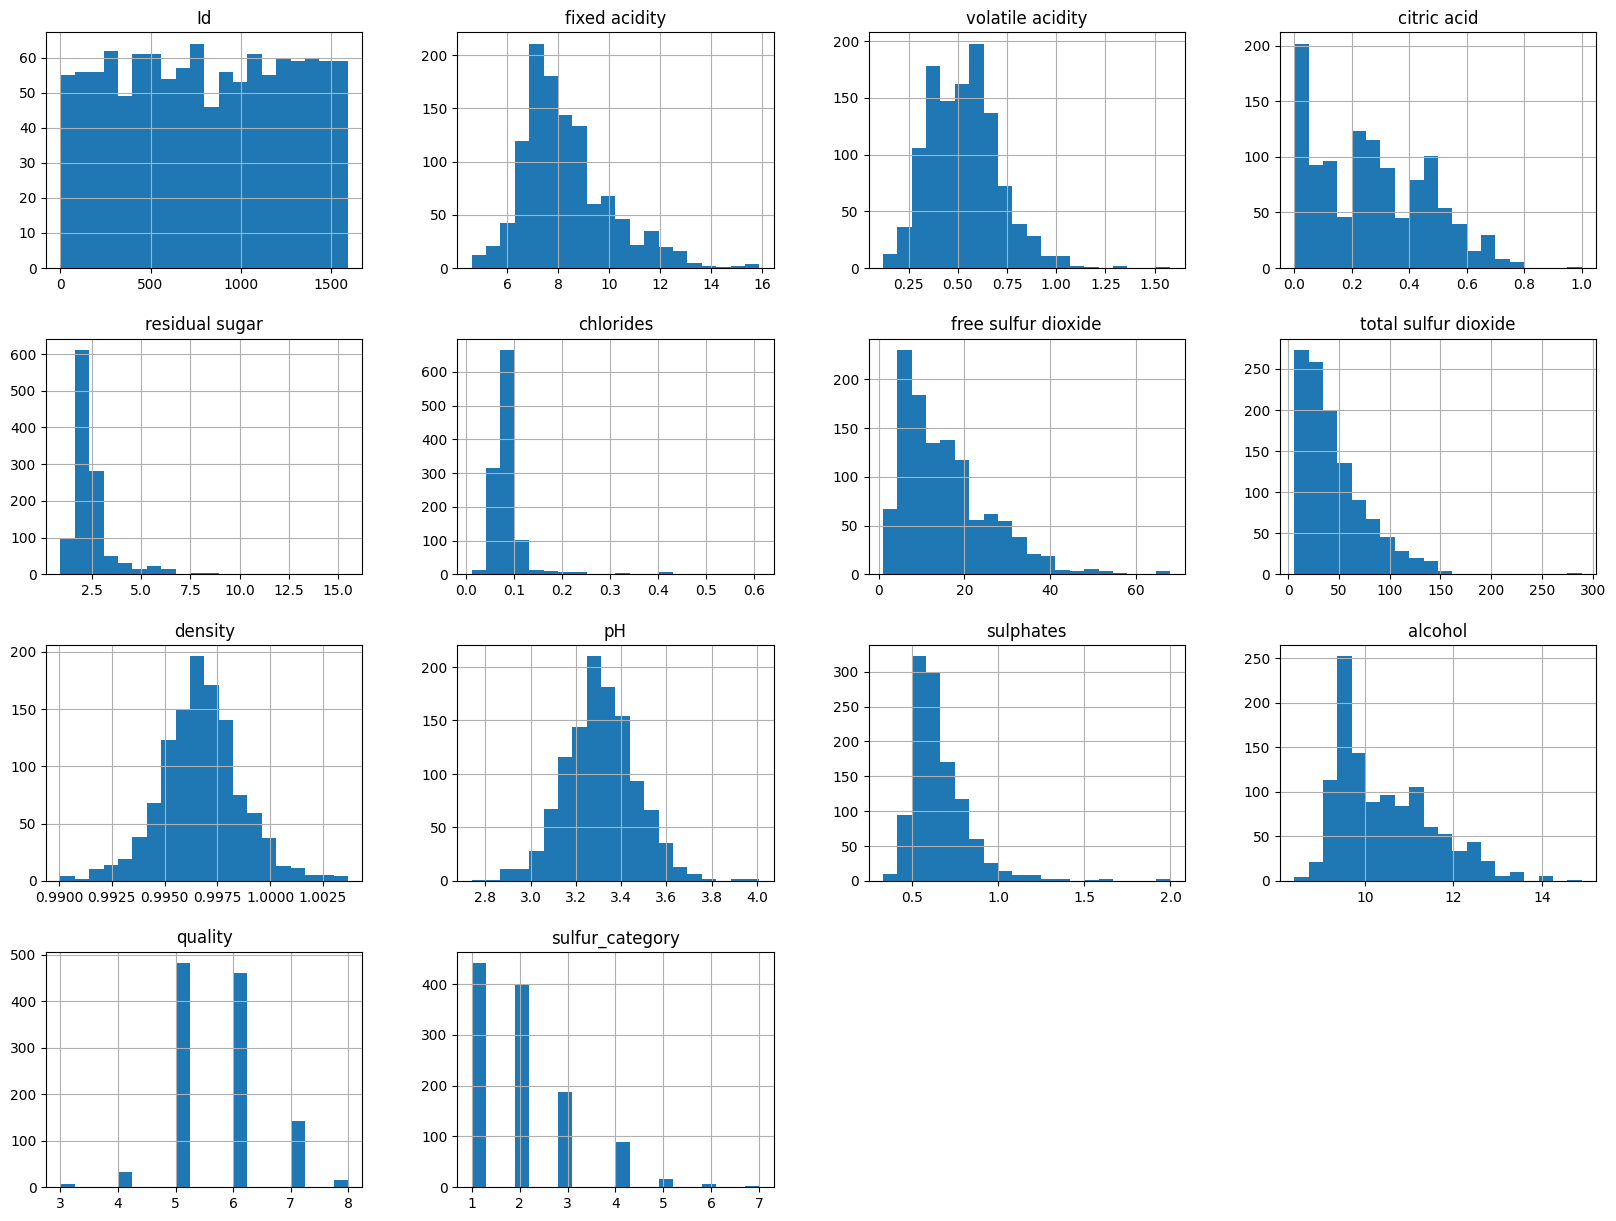

In [91]:
df.hist(bins = 20 , figsize = (20, 15))
plt.show()

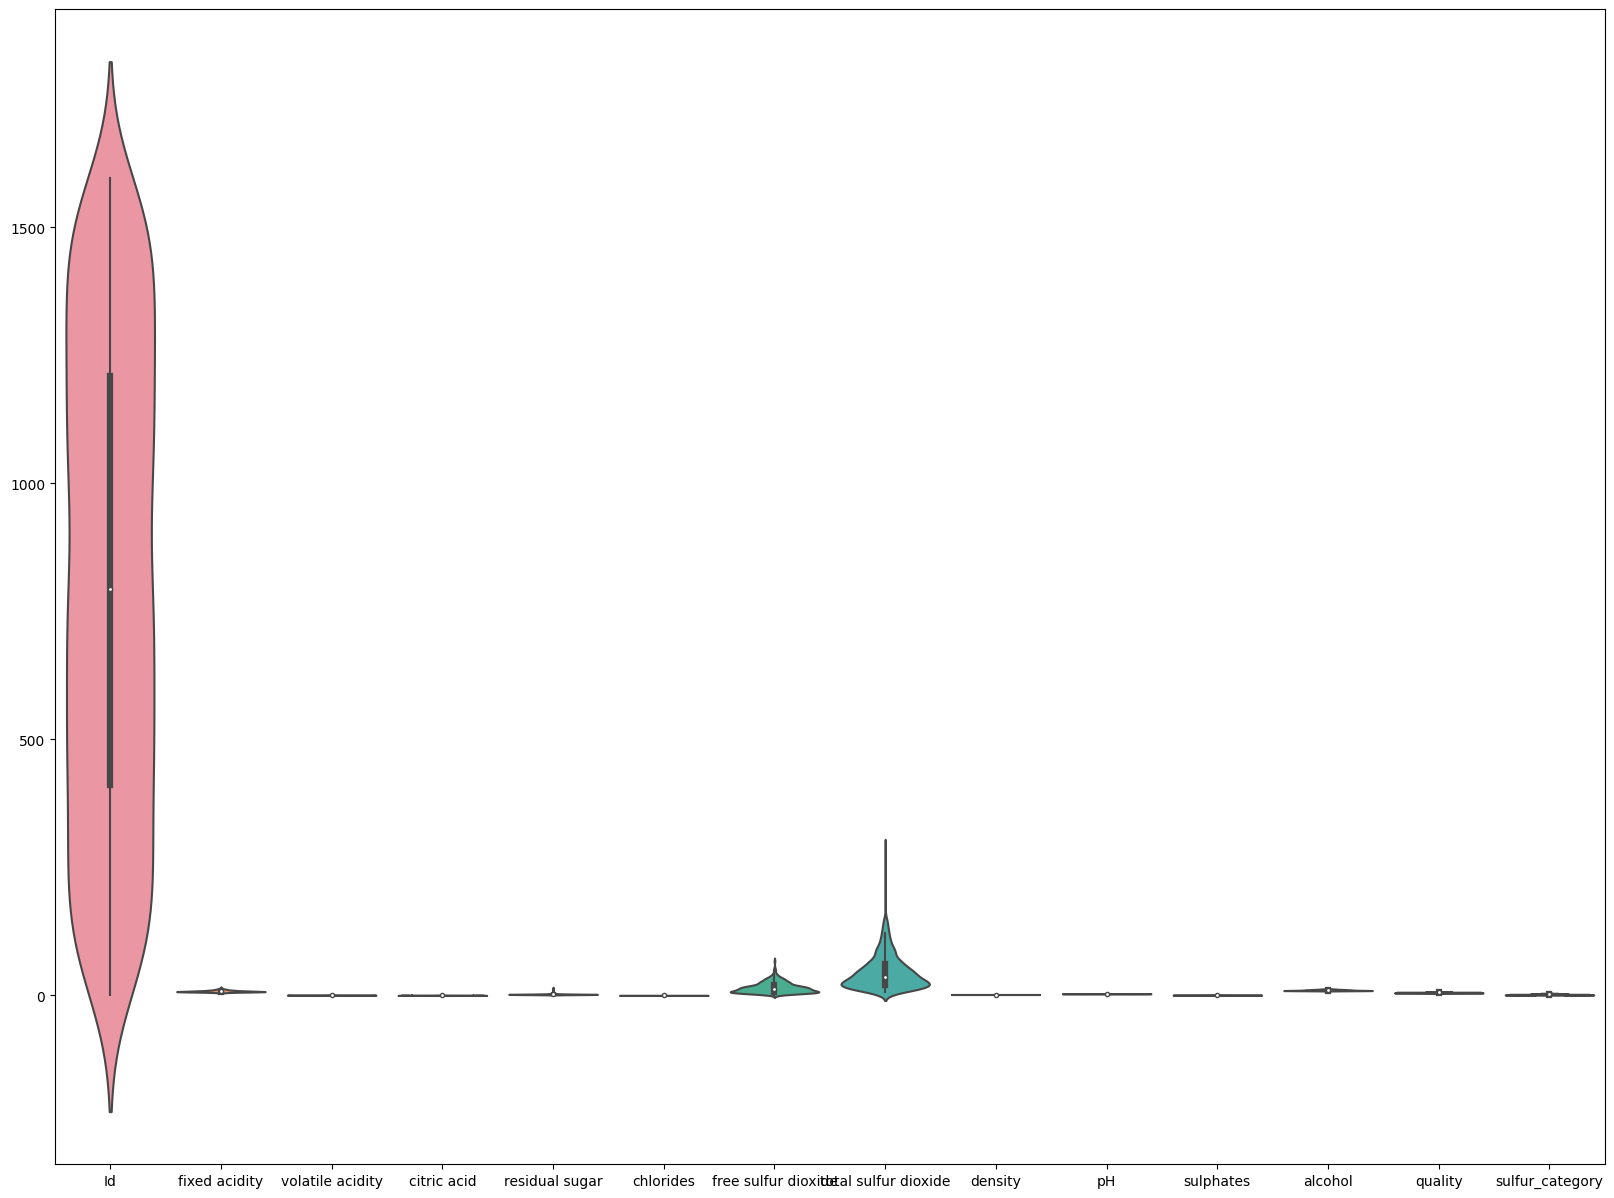

In [93]:
plt.figure(figsize = (20, 15))
sns.violinplot(df, widths=1, scale='count')
plt.show()

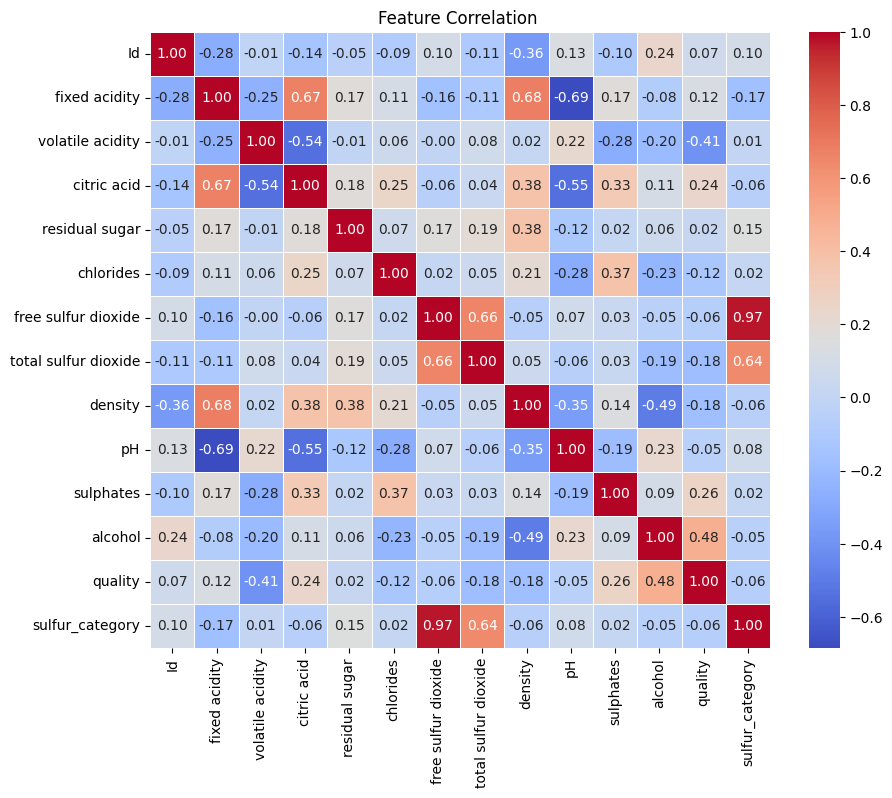

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation ")
plt.show()

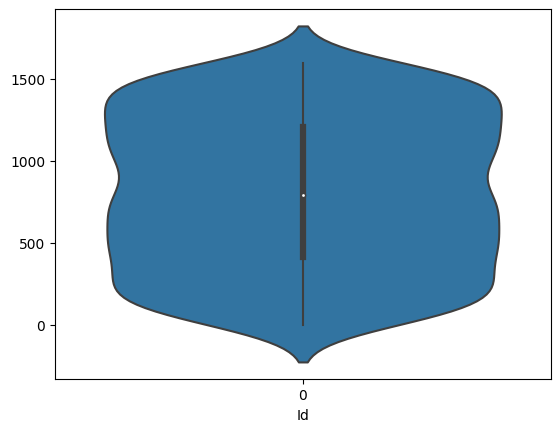

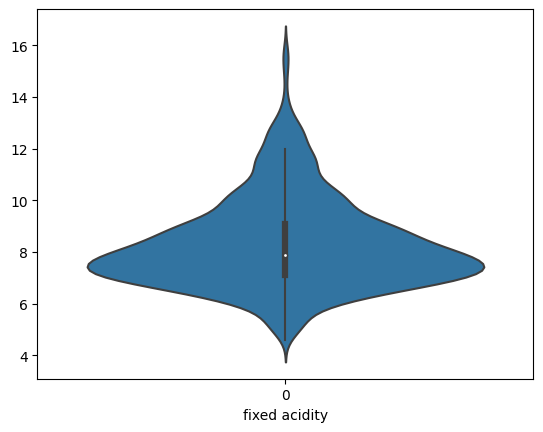

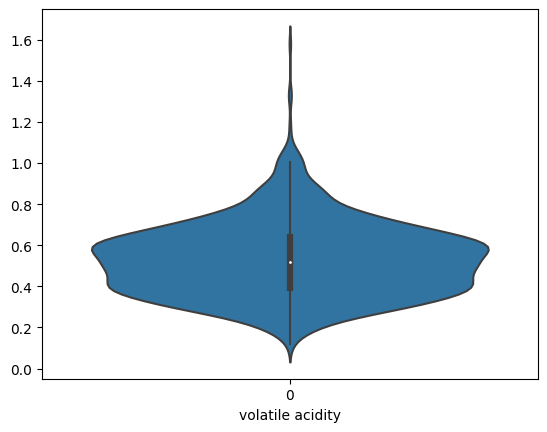

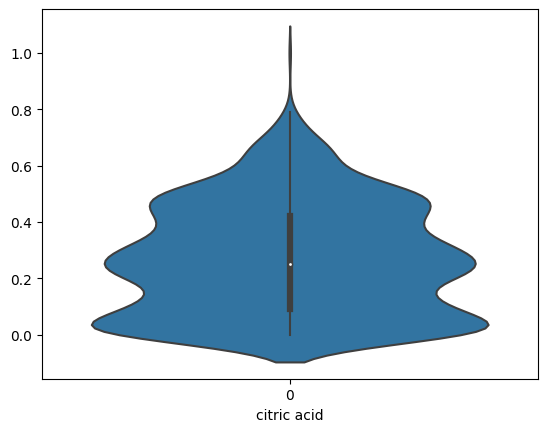

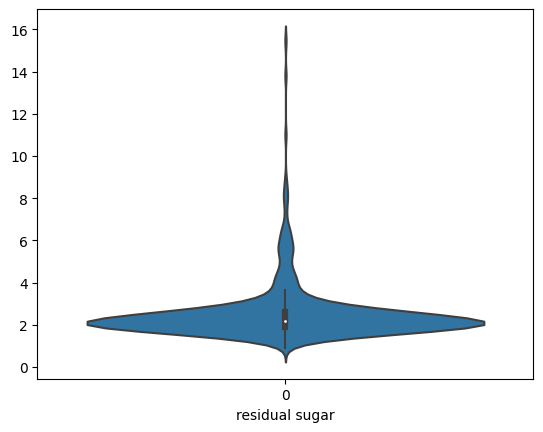

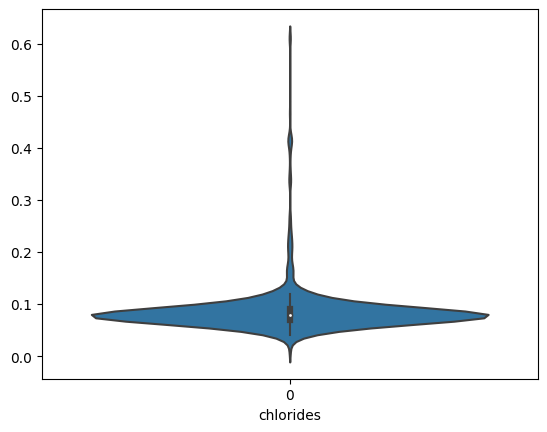

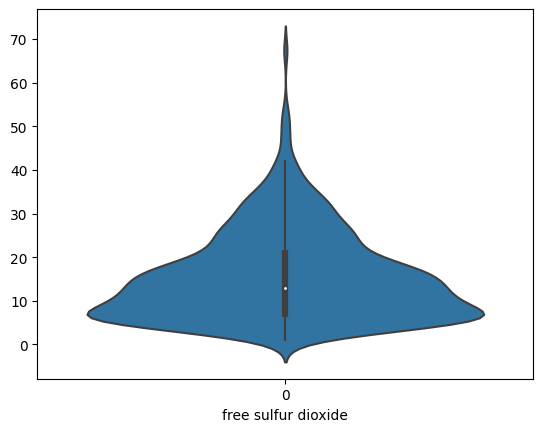

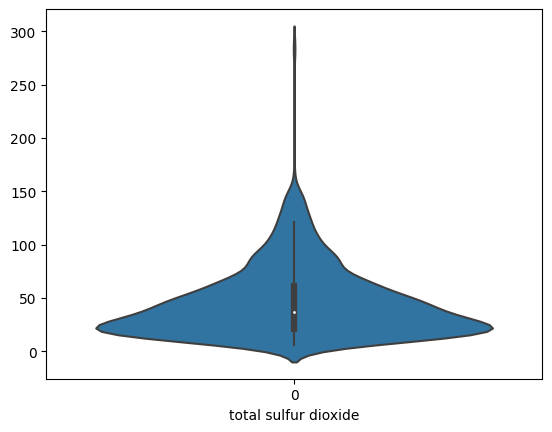

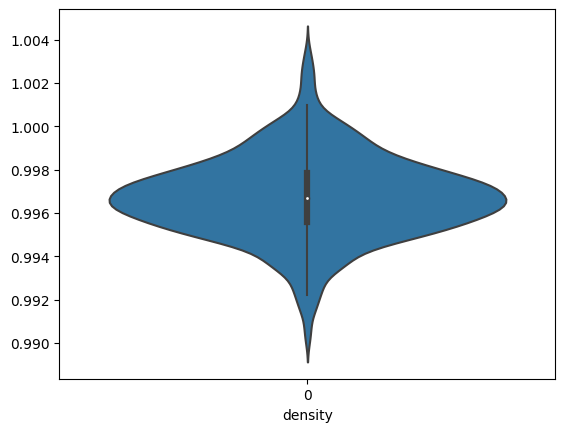

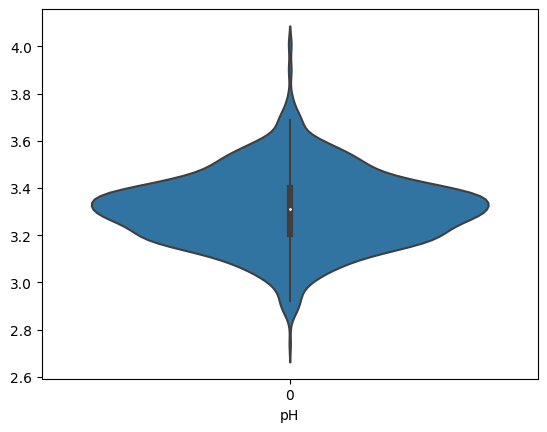

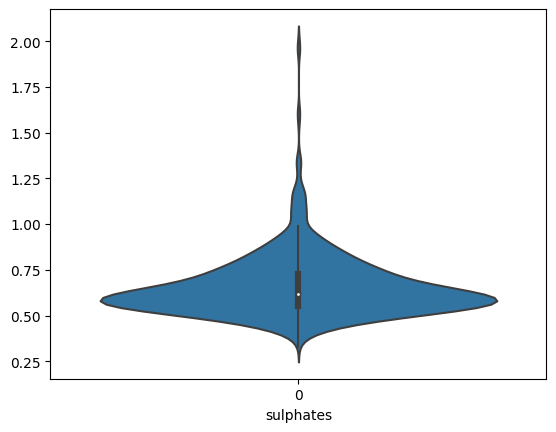

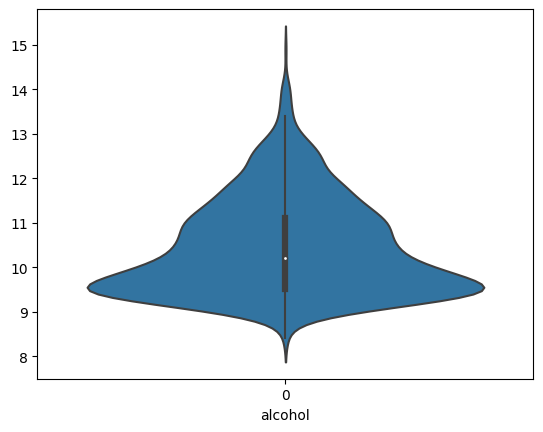

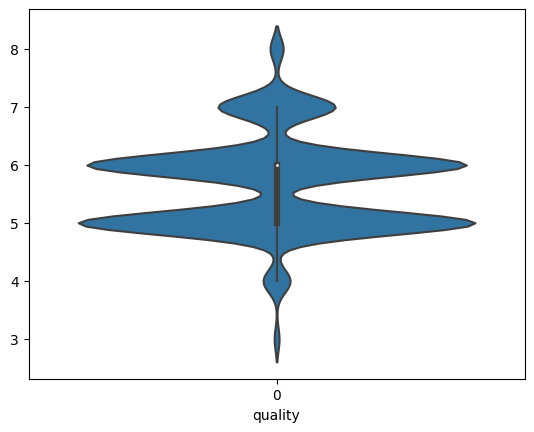

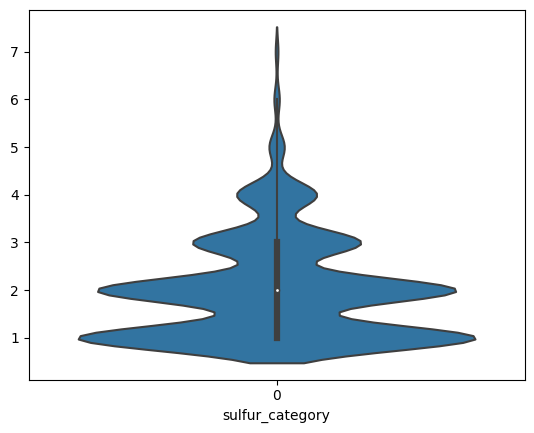

In [95]:
for i in df.columns:
    sns.violinplot(df[i])
    plt.xlabel(i)
    plt.show()

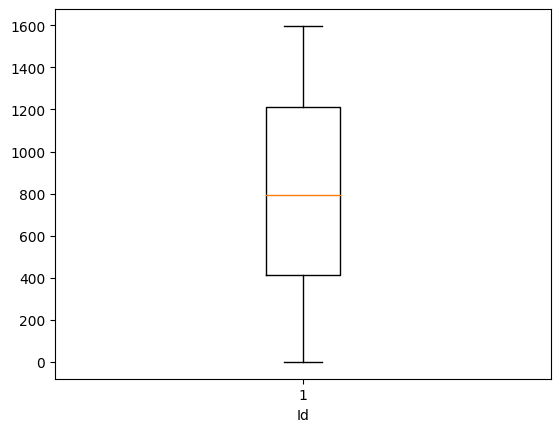

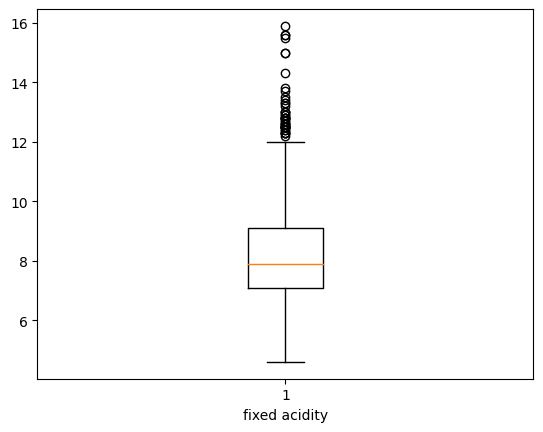

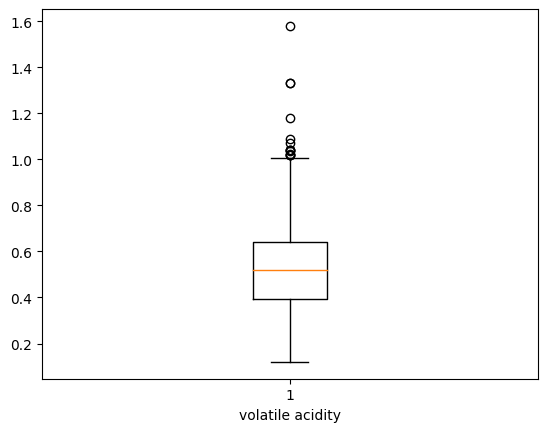

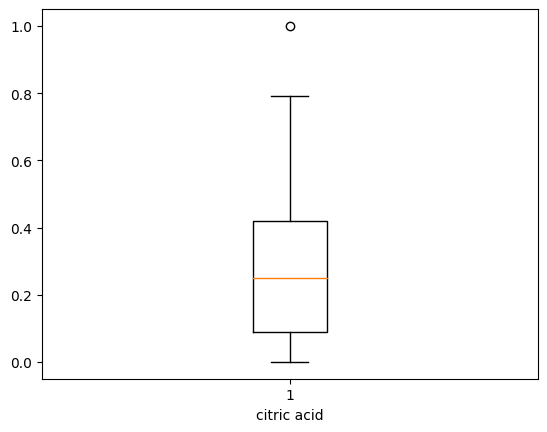

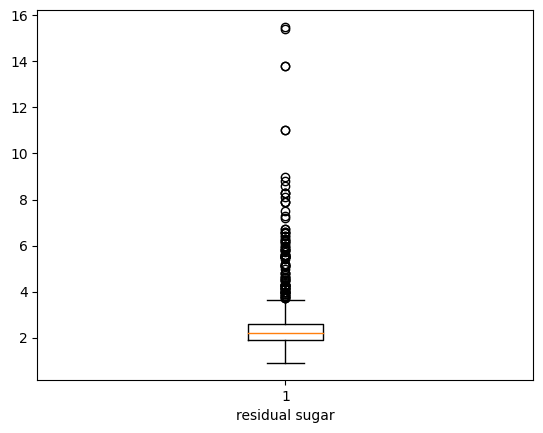

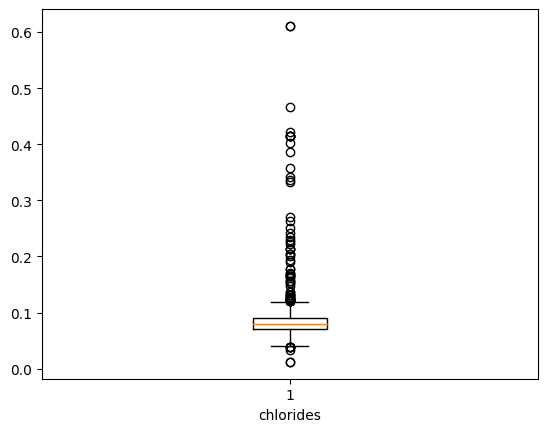

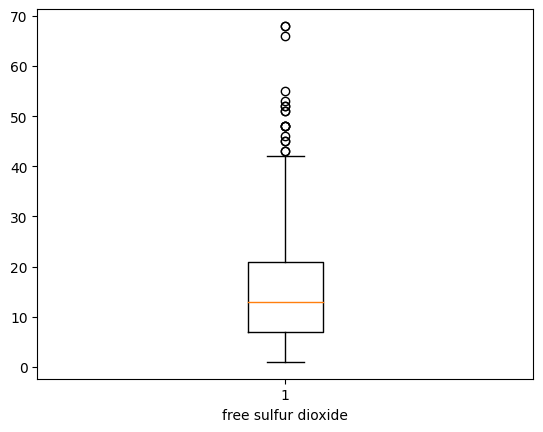

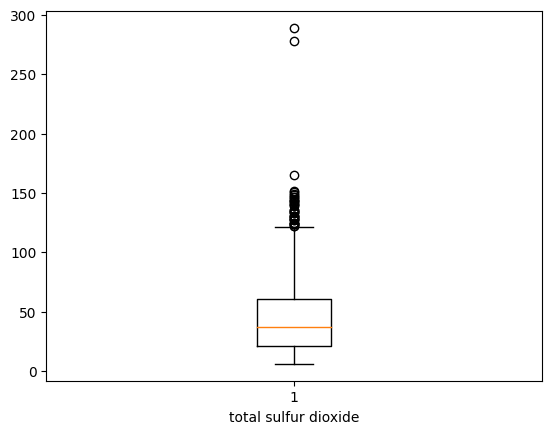

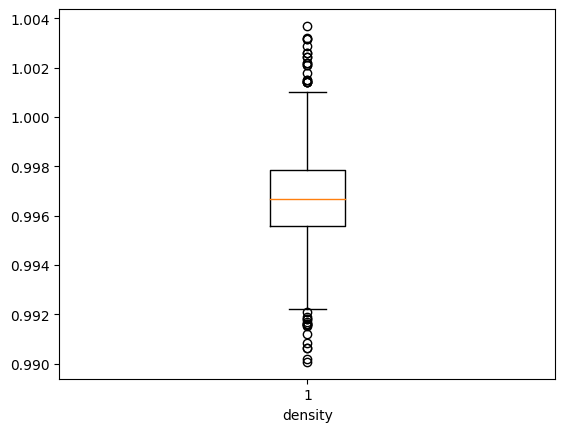

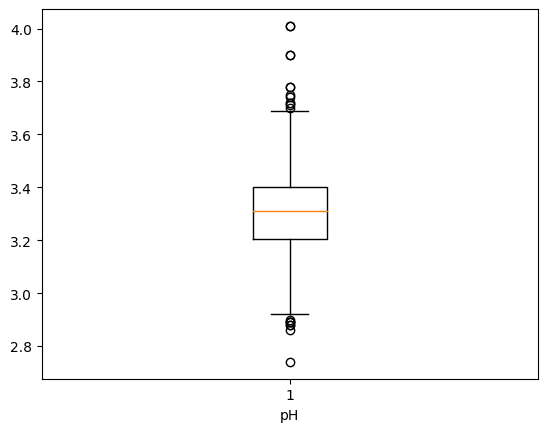

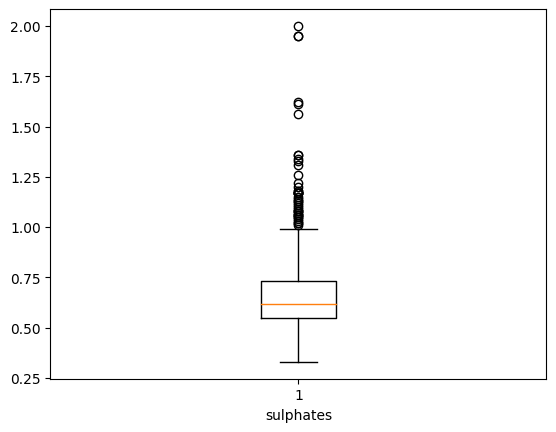

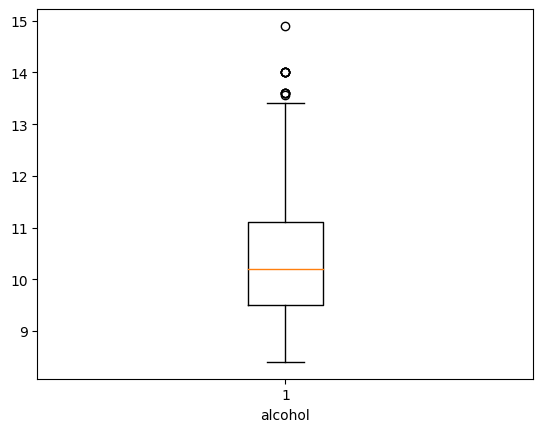

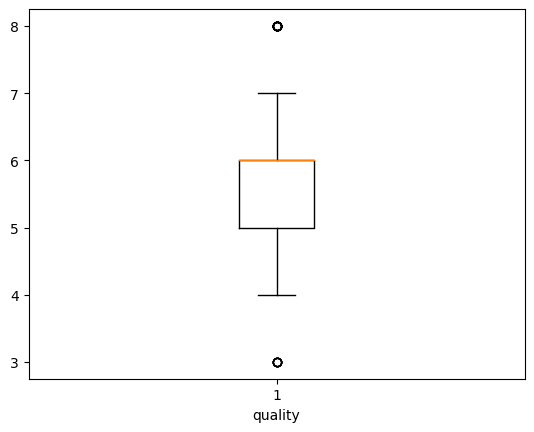

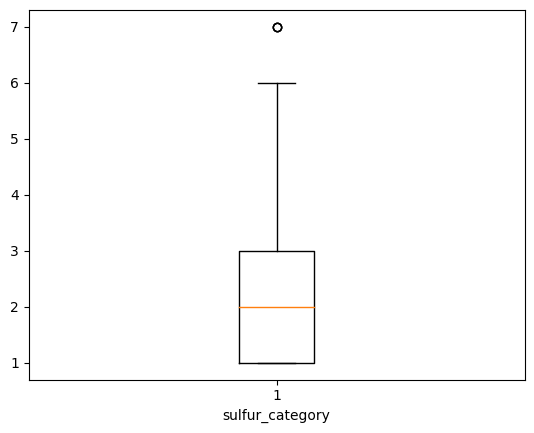

In [97]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

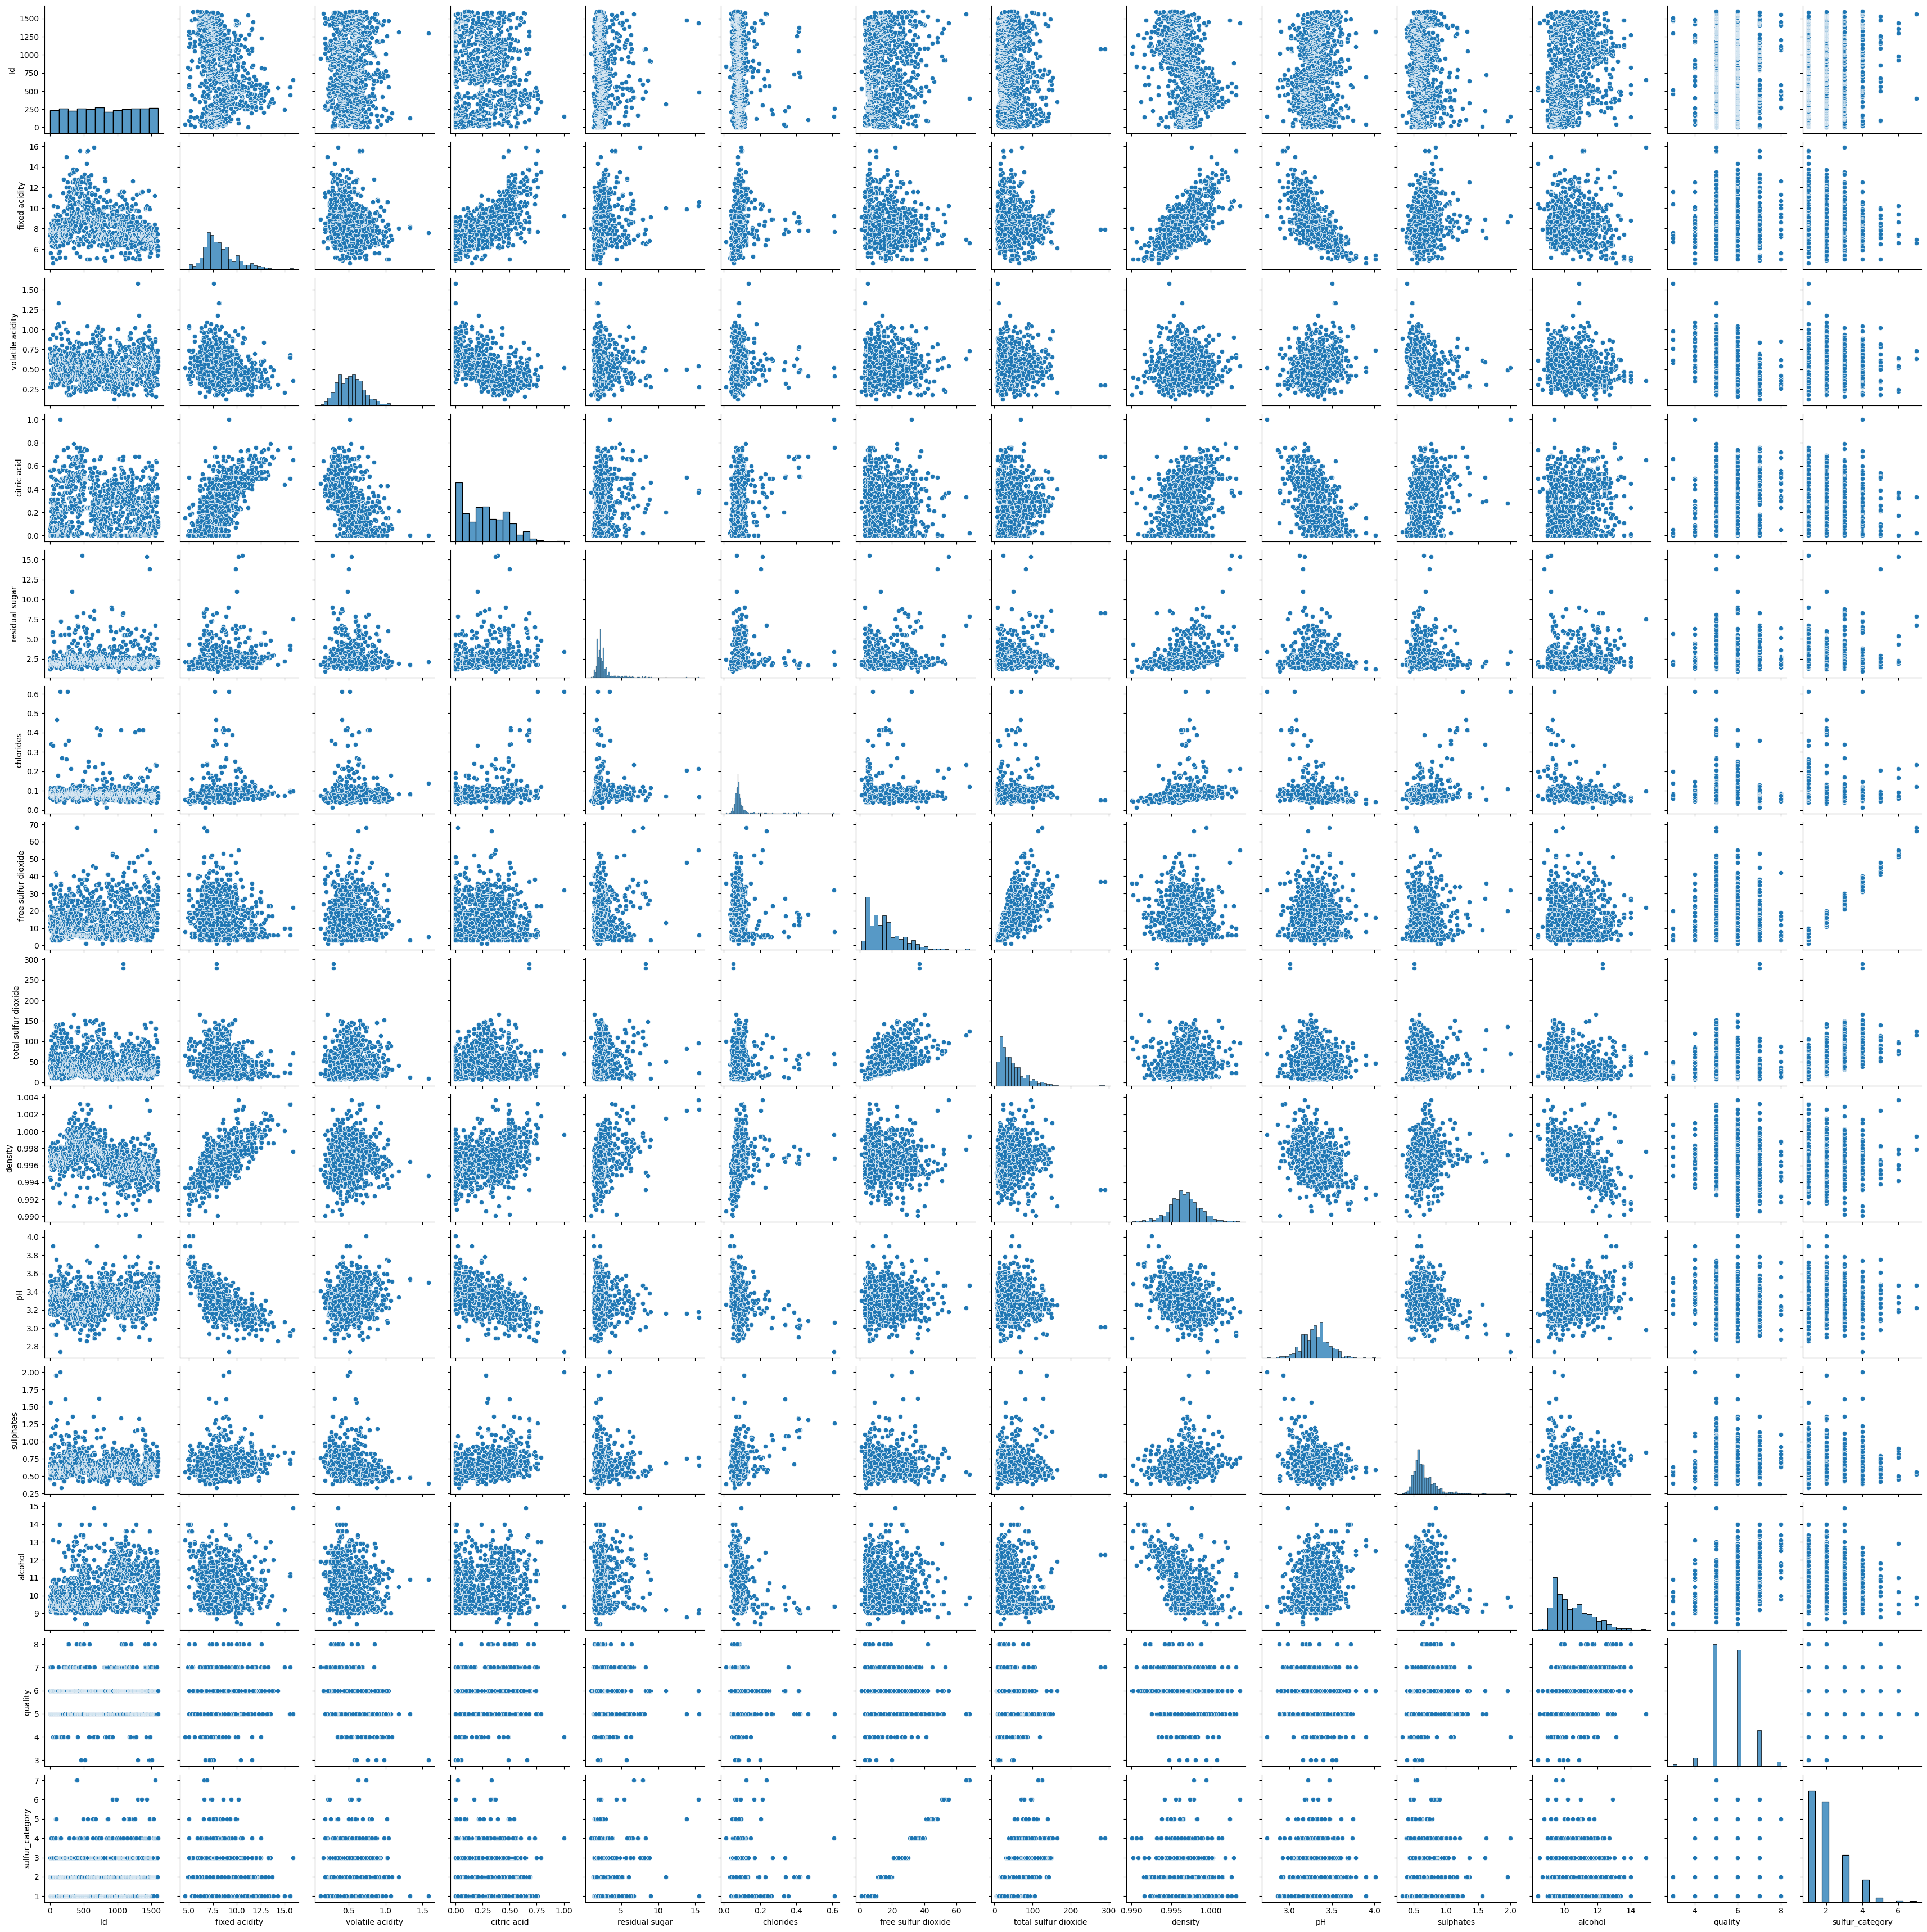

In [98]:
sns.pairplot(df)
plt.show()

Text(0, 0.5, 'alcohol')

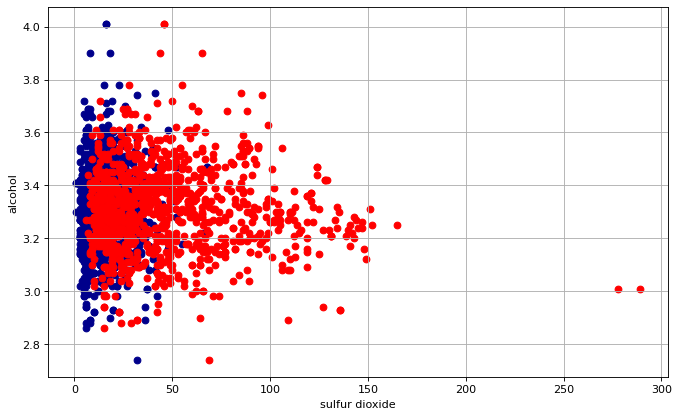

In [100]:
plt.figure(figsize = (10,6) , dpi = 80)
plt.scatter(df ['free sulfur dioxide'], df['pH'], color = 'darkblue')
plt.scatter(df['total sulfur dioxide'], df['pH'] , color = 'red')
plt.grid()
plt.xlabel('sulfur dioxide')
plt.ylabel('alcohol')

Text(0, 0.5, 'quality')

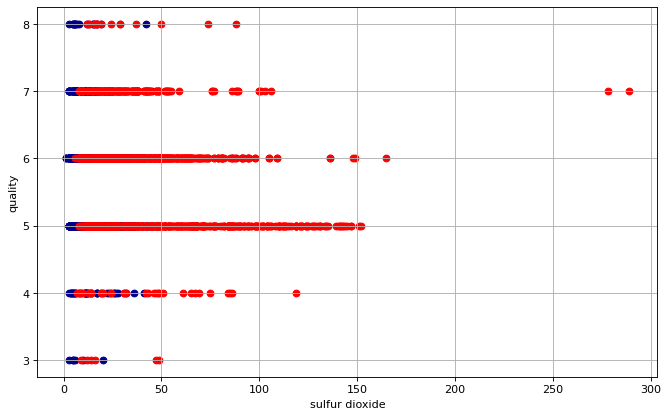

In [101]:
plt.figure(figsize = (10,6) , dpi = 80)
plt.scatter(df ['free sulfur dioxide'], df['quality'], color = 'darkblue')
plt.scatter(df['total sulfur dioxide'], df['quality'] , color = 'red')
plt.grid()
plt.xlabel('sulfur dioxide')
plt.ylabel('quality')

In [103]:
columns_to_square = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                     "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
                     "pH", "sulphates", "alcohol", "quality"]

for col in columns_to_square:
    df[col + "_2"] = df[col] ** 2

df

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0.0            7.4             0.700         0.00             1.9   
1        1.0            7.8             0.880         0.00             2.6   
2        2.0            7.8             0.760         0.04             2.3   
3        3.0           11.2             0.280         0.56             1.9   
4        4.0            7.4             0.700         0.00             1.9   
...      ...            ...               ...          ...             ...   
1138  1592.0            6.3             0.510         0.13             2.3   
1139  1593.0            6.8             0.620         0.08             1.9   
1140  1594.0            6.2             0.600         0.08             2.0   
1141  1595.0            5.9             0.550         0.10             2.2   
1142  1597.0            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                   11                    34  0.99780  3.51   
1         0.098                   25                    67  0.99680  3.20   
2         0.092                   15                    54  0.99700  3.26   
3         0.075                   17                    60  0.99800  3.16   
4         0.076                   11                    34  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                   29                    40  0.99574  3.42   
1139      0.068                   28                    38  0.99651  3.42   
1140      0.090                   32                    44  0.99490  3.45   
1141      0.062                   39                    51  0.99512  3.52   
1142      0.075                   32                    44  0.99547  3.57   

      ...  citric acid_2  residual sugar_2  chlorides_2  \
0     ...         0.0000              3.61     0.005776   
1     ...         0.0000              6.76     0.009604   
2     ...         0.0016              5.29     0.008464   
3     ...         0.3136              3.61     0.005625   
4     ...         0.0000              3.61     0.005776   
...   ...            ...               ...          ...   
1138  ...         0.0169              5.29     0.005776   
1139  ...         0.0064              3.61     0.004624   
1140  ...         0.0064              4.00     0.008100   
1141  ...         0.0100              4.84     0.003844   
1142  ...         0.0144              4.00     0.005625   

      free sulfur dioxide_2  total sulfur dioxide_2  density_2     pH_2  \
0                       121                    1156   0.995605  12.3201   
1                       625                    4489   0.993610  10.2400   
2                       225                    2916   0.994009  10.6276   
3                       289                    3600   0.996004   9.9856   
4                       121                    1156   0.995605  12.3201   
...                     ...                     ...        ...      ...   
1138                    841                    1600   0.991498  11.6964   
1139                    784                    1444   0.993032  11.6964   
1140                   1024                    1936   0.989826  11.9025   
1141                   1521                    2601   0.990264  12.3904   
1142                   1024                    1936   0.990961  12.7449   

      sulphates_2  alcohol_2  quality_2  
0          0.3136      88.36       25.0  
1          0.4624      96.04       25.0  
2          0.4225      96.04       25.0  
3          0.3364      96.04       36.0  
4          0.3136      88.36       25.0  
...           ...        ...        ...  
1138       0.5625     121.00       36.0  
1139       0.6724      90.25       36.0  
1140       0.3364     110.25       25.0  
1141       0.5776     125.44       36.0  
1142       0.5041     104.04       25.0  

[1143 rows x 26 columns]

In [104]:
def new_quality (wine) :
    if wine["quality"] > 5:
        return 1
    else:
        return 0
df["quality"] = df.apply(new_quality, axis = 1)
df.head(10)

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0.0            7.4              0.70         0.00             1.9   
1   1.0            7.8              0.88         0.00             2.6   
2   2.0            7.8              0.76         0.04             2.3   
3   3.0           11.2              0.28         0.56             1.9   
4   4.0            7.4              0.70         0.00             1.9   
5   5.0            7.4              0.66         0.00             1.8   
6   6.0            7.9              0.60         0.06             1.6   
7   7.0            7.3              0.65         0.00             1.2   
8   8.0            7.8              0.58         0.02             2.0   
9  10.0            6.7              0.58         0.08             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  ...  \
0      0.076                   11                    34   0.9978  3.51  ...   
1      0.098                   25                    67   0.9968  3.20  ...   
2      0.092                   15                    54   0.9970  3.26  ...   
3      0.075                   17                    60   0.9980  3.16  ...   
4      0.076                   11                    34   0.9978  3.51  ...   
5      0.075                   13                    40   0.9978  3.51  ...   
6      0.069                   15                    59   0.9964  3.30  ...   
7      0.065                   15                    21   0.9946  3.39  ...   
8      0.073                    9                    18   0.9968  3.36  ...   
9      0.097                   15                    65   0.9959  3.28  ...   

   citric acid_2  residual sugar_2  chlorides_2  free sulfur dioxide_2  \
0         0.0000              3.61     0.005776                    121   
1         0.0000              6.76     0.009604                    625   
2         0.0016              5.29     0.008464                    225   
3         0.3136              3.61     0.005625                    289   
4         0.0000              3.61     0.005776                    121   
5         0.0000              3.24     0.005625                    169   
6         0.0036              2.56     0.004761                    225   
7         0.0000              1.44     0.004225                    225   
8         0.0004              4.00     0.005329                     81   
9         0.0064              3.24     0.009409                    225   

   total sulfur dioxide_2  density_2     pH_2  sulphates_2  alcohol_2  \
0                    1156   0.995605  12.3201       0.3136      88.36   
1                    4489   0.993610  10.2400       0.4624      96.04   
2                    2916   0.994009  10.6276       0.4225      96.04   
3                    3600   0.996004   9.9856       0.3364      96.04   
4                    1156   0.995605  12.3201       0.3136      88.36   
5                    1600   0.995605  12.3201       0.3136      88.36   
6                    3481   0.992813  10.8900       0.2116      88.36   
7                     441   0.989229  11.4921       0.2209     100.00   
8                     324   0.993610  11.2896       0.3249      90.25   
9                    4225   0.991817  10.7584       0.2916      84.64   

   quality_2  
0       25.0  
1       25.0  
2       25.0  
3       36.0  
4       25.0  
5       25.0  
6       25.0  
7       49.0  
8       49.0  
9       25.0  

[10 rows x 26 columns]

In [105]:
df.columns

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'sulfur_category', 'fixed acidity_2', 'volatile acidity_2',
       'citric acid_2', 'residual sugar_2', 'chlorides_2',
       'free sulfur dioxide_2', 'total sulfur dioxide_2', 'density_2', 'pH_2',
       'sulphates_2', 'alcohol_2', 'quality_2'],
      dtype='object')

In [106]:
df["quality"].value_counts()

quality
1    621
0    522
Name: count, dtype: int64

In [107]:
x = pd.DataFrame(df , columns = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'sulfur_category',
       'fixed acidity_2', 'volatile acidity_2', 'citric acid_2',
       'residual sugar_2', 'chlorides_2', 'free sulfur dioxide_2',
       'total sulfur dioxide_2', 'density_2', 'pH_2', 'sulphates_2',
       'alcohol_2', 'quality_2'])
x = df.drop(columns=["quality", "quality_2"])
y = df["quality"].values.reshape(-1, 1)
x

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0.0            7.4             0.700         0.00             1.9   
1        1.0            7.8             0.880         0.00             2.6   
2        2.0            7.8             0.760         0.04             2.3   
3        3.0           11.2             0.280         0.56             1.9   
4        4.0            7.4             0.700         0.00             1.9   
...      ...            ...               ...          ...             ...   
1138  1592.0            6.3             0.510         0.13             2.3   
1139  1593.0            6.8             0.620         0.08             1.9   
1140  1594.0            6.2             0.600         0.08             2.0   
1141  1595.0            5.9             0.550         0.10             2.2   
1142  1597.0            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                   11                    34  0.99780  3.51   
1         0.098                   25                    67  0.99680  3.20   
2         0.092                   15                    54  0.99700  3.26   
3         0.075                   17                    60  0.99800  3.16   
4         0.076                   11                    34  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                   29                    40  0.99574  3.42   
1139      0.068                   28                    38  0.99651  3.42   
1140      0.090                   32                    44  0.99490  3.45   
1141      0.062                   39                    51  0.99512  3.52   
1142      0.075                   32                    44  0.99547  3.57   

      ...  volatile acidity_2  citric acid_2  residual sugar_2  chlorides_2  \
0     ...            0.490000         0.0000              3.61     0.005776   
1     ...            0.774400         0.0000              6.76     0.009604   
2     ...            0.577600         0.0016              5.29     0.008464   
3     ...            0.078400         0.3136              3.61     0.005625   
4     ...            0.490000         0.0000              3.61     0.005776   
...   ...                 ...            ...               ...          ...   
1138  ...            0.260100         0.0169              5.29     0.005776   
1139  ...            0.384400         0.0064              3.61     0.004624   
1140  ...            0.360000         0.0064              4.00     0.008100   
1141  ...            0.302500         0.0100              4.84     0.003844   
1142  ...            0.416025         0.0144              4.00     0.005625   

      free sulfur dioxide_2  total sulfur dioxide_2  density_2     pH_2  \
0                       121                    1156   0.995605  12.3201   
1                       625                    4489   0.993610  10.2400   
2                       225                    2916   0.994009  10.6276   
3                       289                    3600   0.996004   9.9856   
4                       121                    1156   0.995605  12.3201   
...                     ...                     ...        ...      ...   
1138                    841                    1600   0.991498  11.6964   
1139                    784                    1444   0.993032  11.6964   
1140                   1024                    1936   0.989826  11.9025   
1141                   1521                    2601   0.990264  12.3904   
1142                   1024                    1936   0.990961  12.7449   

      sulphates_2  alcohol_2  
0          0.3136      88.36  
1          0.4624      96.04  
2          0.4225      96.04  
3          0.3364      96.04  
4          0.3136      88.36  
...           ...        ...  
1138       0.5625     121.00  
1139       0.6724      90.25  
1140       0.3364  

In [108]:
x = pd.DataFrame(df , columns = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'sulfur_category',
       'fixed acidity_2', 'volatile acidity_2', 'citric acid_2',
       'residual sugar_2', 'chlorides_2', 'free sulfur dioxide_2',
       'total sulfur dioxide_2', 'density_2', 'pH_2', 'sulphates_2',
       'alcohol_2', 'quality_2'])
x = df.drop(columns=["quality", "quality_2"])
y = df["quality"].values.reshape(-1, 1)
x

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0.0            7.4             0.700         0.00             1.9   
1        1.0            7.8             0.880         0.00             2.6   
2        2.0            7.8             0.760         0.04             2.3   
3        3.0           11.2             0.280         0.56             1.9   
4        4.0            7.4             0.700         0.00             1.9   
...      ...            ...               ...          ...             ...   
1138  1592.0            6.3             0.510         0.13             2.3   
1139  1593.0            6.8             0.620         0.08             1.9   
1140  1594.0            6.2             0.600         0.08             2.0   
1141  1595.0            5.9             0.550         0.10             2.2   
1142  1597.0            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                   11                    34  0.99780  3.51   
1         0.098                   25                    67  0.99680  3.20   
2         0.092                   15                    54  0.99700  3.26   
3         0.075                   17                    60  0.99800  3.16   
4         0.076                   11                    34  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                   29                    40  0.99574  3.42   
1139      0.068                   28                    38  0.99651  3.42   
1140      0.090                   32                    44  0.99490  3.45   
1141      0.062                   39                    51  0.99512  3.52   
1142      0.075                   32                    44  0.99547  3.57   

      ...  volatile acidity_2  citric acid_2  residual sugar_2  chlorides_2  \
0     ...            0.490000         0.0000              3.61     0.005776   
1     ...            0.774400         0.0000              6.76     0.009604   
2     ...            0.577600         0.0016              5.29     0.008464   
3     ...            0.078400         0.3136              3.61     0.005625   
4     ...            0.490000         0.0000              3.61     0.005776   
...   ...                 ...            ...               ...          ...   
1138  ...            0.260100         0.0169              5.29     0.005776   
1139  ...            0.384400         0.0064              3.61     0.004624   
1140  ...            0.360000         0.0064              4.00     0.008100   
1141  ...            0.302500         0.0100              4.84     0.003844   
1142  ...            0.416025         0.0144              4.00     0.005625   

      free sulfur dioxide_2  total sulfur dioxide_2  density_2     pH_2  \
0                       121                    1156   0.995605  12.3201   
1                       625                    4489   0.993610  10.2400   
2                       225                    2916   0.994009  10.6276   
3                       289                    3600   0.996004   9.9856   
4                       121                    1156   0.995605  12.3201   
...                     ...                     ...        ...      ...   
1138                    841                    1600   0.991498  11.6964   
1139                    784                    1444   0.993032  11.6964   
1140                   1024                    1936   0.989826  11.9025   
1141                   1521                    2601   0.990264  12.3904   
1142                   1024                    1936   0.990961  12.7449   

      sulphates_2  alcohol_2  
0          0.3136      88.36  
1          0.4624      96.04  
2          0.4225      96.04  
3          0.3364      96.04  
4          0.3136      88.36  
...           ...        ...  
1138       0.5625     121.00  
1139       0.6724      90.25  
1140       0.3364  

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(914, 24) (229, 24) (914, 1) (229, 1)


In [112]:
k = 10
clf = KNeighborsClassifier(k)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aec136ba020>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


Accuracy: 0.6724890829694323


In [115]:
K = 10
Acc = np.zeros((K))

for i in range(1, K + 1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i - 1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.70742358, 0.63755459, 0.69432314, 0.65938865, 0.68995633,
       0.68122271, 0.68558952, 0.68995633, 0.65502183, 0.67248908])

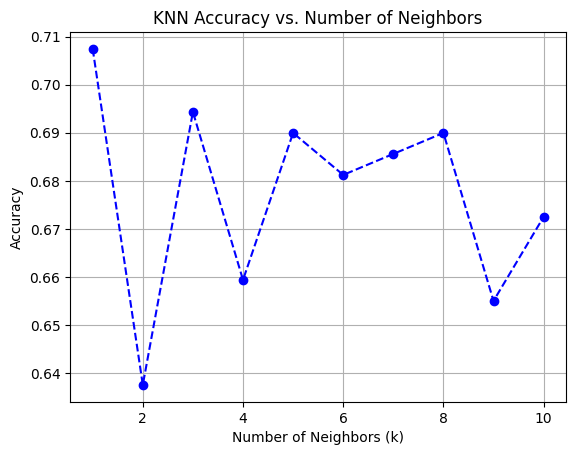

In [117]:
plt.plot(range(1, K + 1), Acc, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()
training_acc  = []
test_acc = []



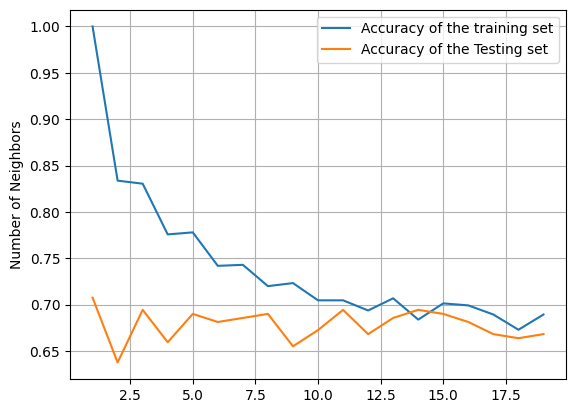

In [118]:
training_acc  = []
test_acc = []

neighbors_setting = range(1, 20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
    
    
plt.plot(neighbors_setting, training_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the Testing set")
plt.ylabel("Accuracy")
plt.ylabel("Number of Neighbors")
plt.grid()
plt.legend()

In [ ]:
correlation_matrix = df.corr()

print("Correlation with target (quality):")
print(correlation_matrix['quality'])


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()